In [15]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

def plot_image(images, title=None, labels=None, size=(4, 4), cmap='gray'):
    if not isinstance(images, list):
        images = [images]
 
    if not isinstance(labels, list):
        labels = []
 
    fig, axs = plt.subplots(1, len(images), figsize=size,  dpi=150)
 
    if title is not None:
        fig.suptitle(title, fontsize=16)
    need_titles = len(labels) == len(images)
    for i, image in enumerate(images):
        ax = axs[i] if len(images) > 1 else axs
 
        if need_titles:
            ax.set_title(labels[i])
        ax.imshow(image, cmap)
        ax.axis('off')

In [16]:
import imutils
import cv2

In [17]:
def rotateImage(image, angle):
    image_center = tuple(np.array(image.shape[1::-1]) / 2)
    rot_mat = cv2.getRotationMatrix2D(image_center, angle, 1.0)
    result = cv2.warpAffine(image, rot_mat, image.shape[1::-1], flags=cv2.INTER_LINEAR)
    return result

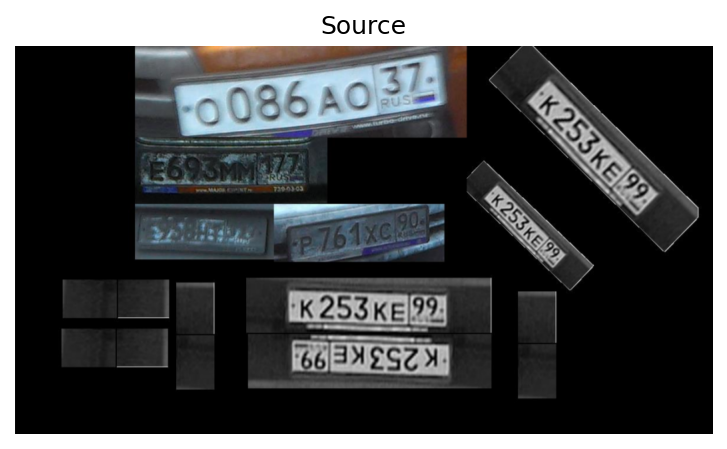

In [18]:
img = cv2.imread('./plate_number.png')
plot_image(img, labels=['Source'], size=(6,6))

In [19]:
img = np.vectorize(lambda x: int(min(x**1.1, 255)))(img).astype('uint8')

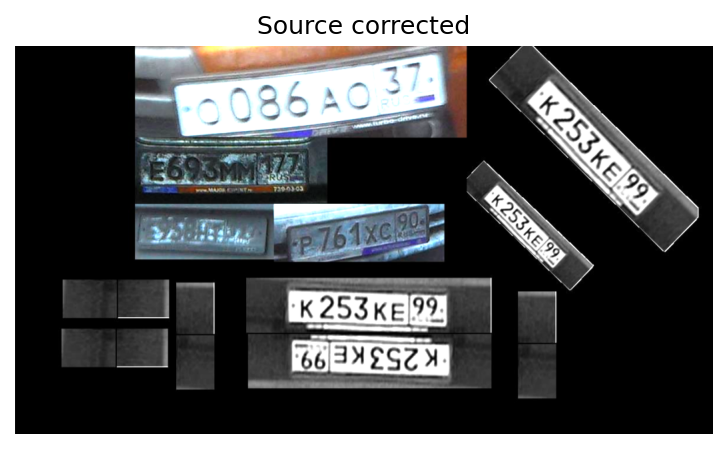

In [20]:
plot_image(img, labels=['Source corrected'], size=(6,6))

In [21]:
license_plate_cascade = cv2.CascadeClassifier('haarcascade_russian_plate_number.xml')

In [22]:
prepared_img = img.copy()
cv2.rectangle(prepared_img, (0, 0), (img.shape[1], img.shape[0]), (255, 0, 0), 2)
prepared_img = imutils.rotate_bound(prepared_img, 45)
prepared_img = imutils.rotate_bound(prepared_img, -45)

res_image = prepared_img.copy()

In [23]:
def makeRotations(prepared_img, res_image, direction, step, count):
    cnt = 0
    for i in range(count):
        angle = step * i * direction
        gray_rotated = cv2.cvtColor(prepared_img, cv2.COLOR_BGR2GRAY)
        license_plates = license_plate_cascade.detectMultiScale(gray_rotated)
        for (x, y, w, h) in license_plates:
            if (w > 2 * h) and (w * h > 6000):
                w, h, x, y = proccessSize(w, h, x, y)
                start_point = (x + int(w * 0.1), y + int(h * 0.15))
                end_point = (start_point[0] + int(w * 0.8), start_point[1] + int(h * 0.7))
                cv2.rectangle(res_image, start_point, end_point, (0,255,0), 2)
                cv2.rectangle(prepared_img, start_point, end_point, (0,255,0), cv2.FILLED)
                cnt += 1
        prepared_img = rotateImage(prepared_img, step * direction)
        res_image = rotateImage(res_image, step * direction)
    return res_image

In [24]:
res_image = makeRotations(prepared_img, res_image, 1, 15, 6)
res_image = rotateImage(res_image, -90)

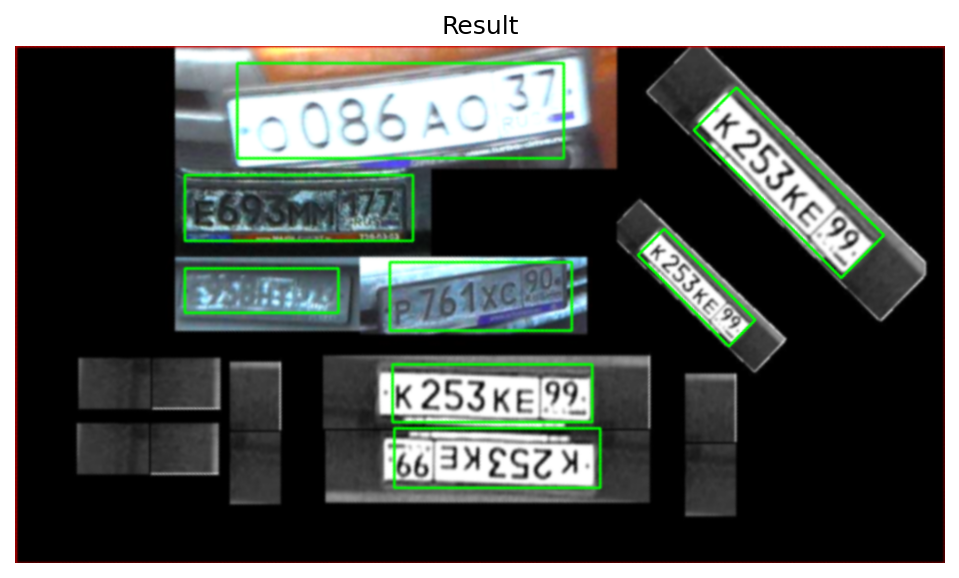

In [25]:
source_w, source_h = img.shape[1], img.shape[0]
res_w, res_h = res_image.shape[1], res_image.shape[0]
offset_x, offset_y = (res_w - source_w) // 2, (res_h - source_h) // 2
cropped_image = res_image[offset_y : source_h + offset_y, offset_x : source_w + offset_x]
plot_image(cropped_image, labels=['Result'], size=(8,8))